# crocoloko data analysis
## album: the crocodile come alive

In [1]:
import spotipy
import json
import time
import sys
import pandas as pd
import numpy as np

In [2]:
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
client_id = 'e2259109005e4bca90a98a851f042e7e'
client_secret = '7a39ee07c96d451298fa86308bd66ae0'

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [4]:
name = "crocoloko" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/14rJsXfdDhM68msOhfXgSH'},
  'href': 'https://api.spotify.com/v1/artists/14rJsXfdDhM68msOhfXgSH',
  'id': '14rJsXfdDhM68msOhfXgSH',
  'name': 'Crocoloko',
  'type': 'artist',
  'uri': 'spotify:artist:14rJsXfdDhM68msOhfXgSH'}]

In [5]:
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])

In [6]:
album_uris

['spotify:album:43CNlNIcLcywjvbeiRKV6F',
 'spotify:album:31nDsqqEd7xJ3mwWavvkHa']

In [7]:
album_names

['The Crocodile Come Alive Pt. 2', 'The Crocodile Come Alive']

### get track ids

In [8]:
tids = []
t_names = []
for i, t in enumerate(result['tracks']['items']):
    print(' ', i, t['name'])
    t_names.append(t['name'])
    tids.append(t['uri'])

  0 Alice in wonderland
  1 Sex Drugs Goa Trance
  2 The Voice Of The Butterfly
  3 Sound of the middle east
  4 The Crocodile Come Alive
  5 Voice of Butterfly - Vandeta & Ayawaska Remix
  6 Chess Game
  7 Hippie Logic
  8 Sakaro Flute
  9 Psychedelic trip to neptune ( 2018 remix )


In [9]:
t_names

['Alice in wonderland',
 'Sex Drugs Goa Trance',
 'The Voice Of The Butterfly',
 'Sound of the middle east',
 'The Crocodile Come Alive',
 'Voice of Butterfly - Vandeta & Ayawaska Remix',
 'Chess Game',
 'Hippie Logic',
 'Sakaro Flute',
 'Psychedelic trip to neptune ( 2018 remix )']

In [10]:
start = time.time()
features = sp.audio_features(tids)
delta = time.time() - start
print("time to get the data = ",delta)

time to get the data =  0.3104417324066162


In [11]:
len(features)

10

In [12]:
features[0]

{'danceability': 0.728,
 'energy': 0.755,
 'key': 7,
 'loudness': -8.536,
 'mode': 1,
 'speechiness': 0.0373,
 'acousticness': 0.000451,
 'instrumentalness': 0.242,
 'liveness': 0.129,
 'valence': 0.213,
 'tempo': 145.02,
 'type': 'audio_features',
 'id': '4g72i37zDt6O7GWaq4bSlY',
 'uri': 'spotify:track:4g72i37zDt6O7GWaq4bSlY',
 'track_href': 'https://api.spotify.com/v1/tracks/4g72i37zDt6O7GWaq4bSlY',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4g72i37zDt6O7GWaq4bSlY',
 'duration_ms': 453517,
 'time_signature': 4}

In [13]:
features[0]['danceability']

0.728

# check about popularity **************************

In [14]:
t_popularity = []
for track in tids:
    pop = sp.track(track)
    # pop is a dict with many attributes, we are interested at the moment in popularity
    t_popularity.append(pop['popularity'])

In [15]:
def get_tracks_features_into_dict(tracks_features):
    t_id = []
    t_danceability = []
    t_energy = []
    t_loudness = []
    t_speechiness = []
    t_acousticness = []
    t_instrumentalness = []
    t_liveness = []
    t_valence = []
    t_tempo = []
    t_duration_ms = []
    for i in range(len(t_names)):
        t_id.append(tracks_features[i]['id'])
        t_danceability.append(tracks_features[i]['danceability'])
        t_energy.append(tracks_features[i]['energy'])
        t_loudness.append(tracks_features[i]['loudness'])
        t_speechiness.append(tracks_features[i]['speechiness'])
        t_acousticness.append(tracks_features[i]['acousticness'])
        t_instrumentalness.append(tracks_features[i]['instrumentalness'])
        t_liveness.append(tracks_features[i]['liveness'])
        t_valence.append(tracks_features[i]['valence'])
        t_tempo.append(tracks_features[i]['tempo'])
        t_duration_ms.append(tracks_features[i]['duration_ms'])
    #create a dictionary    
    d = {'id':t_id,
         'danceability':t_danceability,
         'energy':t_energy,
         'loudness':t_loudness,
         'speechiness':t_speechiness,
         'acousticness':t_acousticness,
         'instrumentalness':t_instrumentalness,
         'liveness':t_liveness,
         'valence':t_valence,
         'tempo':t_tempo,
         'duration_ms':t_duration_ms
    }
    
    return d

In [16]:
songs_features_dict = get_tracks_features_into_dict(features)

In [17]:
songs_features_dict

{'id': ['4g72i37zDt6O7GWaq4bSlY',
  '0VCB3fiBkzu9mkOM5ggzCC',
  '56g9Tk8Jt6KNfcnvfMyZA5',
  '0xa1zN8iuQp4hr4gGTAc8i',
  '6nSh5PiQiPJoLLuTResyy3',
  '17lZq8OoMOSEImRdafIg33',
  '48n9OUfIIDyu77ruSzHcgp',
  '27yXbkjykK4NlfSsRbV8Mt',
  '6mUtNxACmEgBtxk4m4CFT1',
  '1f5gQ4WjvjgWokPjtAFPtg'],
 'danceability': [0.728,
  0.659,
  0.648,
  0.728,
  0.655,
  0.594,
  0.627,
  0.62,
  0.674,
  0.704],
 'energy': [0.755,
  0.847,
  0.602,
  0.839,
  0.863,
  0.792,
  0.931,
  0.97,
  0.96,
  0.912],
 'loudness': [-8.536,
  -6.175,
  -9.565,
  -11.479,
  -8.949,
  -6.686,
  -8.652,
  -6.935,
  -7.197,
  -9.436],
 'speechiness': [0.0373,
  0.0973,
  0.045,
  0.104,
  0.0919,
  0.0451,
  0.0454,
  0.0659,
  0.05,
  0.0529],
 'acousticness': [0.000451,
  0.000217,
  0.0014,
  0.00393,
  0.000537,
  0.016,
  4.93e-05,
  0.000299,
  0.000205,
  0.0119],
 'instrumentalness': [0.242,
  0.458,
  0.755,
  0.788,
  0.754,
  0.805,
  0.817,
  0.8,
  0.74,
  0.853],
 'liveness': [0.129,
  0.104,
  0.0998,
  0.1

## create dataframe

In [18]:
crocoloko_tcca_df = pd.DataFrame(songs_features_dict)
crocoloko_tcca_df.head()

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,4g72i37zDt6O7GWaq4bSlY,0.728,0.755,-8.536,0.0373,0.000451,0.242,0.1290,0.213,145.020,453517
1,0VCB3fiBkzu9mkOM5ggzCC,0.659,0.847,-6.175,0.0973,0.000217,0.458,0.1040,0.337,145.036,523035
2,56g9Tk8Jt6KNfcnvfMyZA5,0.648,0.602,-9.565,0.0450,0.001400,0.755,0.0998,0.154,145.010,458483
3,0xa1zN8iuQp4hr4gGTAc8i,0.728,0.839,-11.479,0.1040,0.003930,0.788,0.1130,0.118,144.986,394345
4,6nSh5PiQiPJoLLuTResyy3,0.655,0.863,-8.949,0.0919,0.000537,0.754,0.1570,0.601,144.971,446897


In [19]:
crocoloko_tcca_df.insert(11, "popularity", pd.Series(t_popularity) , True) 
crocoloko_tcca_df.insert(12, "track_type", 'psy' , True)
crocoloko_tcca_df = crocoloko_tcca_df.set_index('id')

In [20]:
crocoloko_tcca_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,track_type
id,,,,,,,,,,,,
4g72i37zDt6O7GWaq4bSlY,0.728,0.755,-8.536,0.0373,0.000451,0.242,0.1290,0.2130,145.020,453517,30,psy
0VCB3fiBkzu9mkOM5ggzCC,0.659,0.847,-6.175,0.0973,0.000217,0.458,0.1040,0.3370,145.036,523035,23,psy
56g9Tk8Jt6KNfcnvfMyZA5,0.648,0.602,-9.565,0.0450,0.001400,0.755,0.0998,0.1540,145.010,458483,18,psy
0xa1zN8iuQp4hr4gGTAc8i,0.728,0.839,-11.479,0.1040,0.003930,0.788,0.1130,0.1180,144.986,394345,13,psy
6nSh5PiQiPJoLLuTResyy3,0.655,0.863,-8.949,0.0919,0.000537,0.754,0.1570,0.6010,144.971,446897,19,psy
17lZq8OoMOSEImRdafIg33,0.594,0.792,-6.686,0.0451,0.016000,0.805,0.0945,0.1010,145.016,384092,16,psy
48n9OUfIIDyu77ruSzHcgp,0.627,0.931,-8.652,0.0454,0.000049,0.817,0.6350,0.7010,145.010,486621,6,psy
27yXbkjykK4NlfSsRbV8Mt,0.620,0.970,-6.935,0.0659,0.000299,0.800,0.2830,0.6880,141.988,517183,9,psy
6mUtNxACmEgBtxk4m4CFT1,0.674,0.960,-7.197,0.0500,0.000205,0.740,0.0931,0.0885,145.008,440276,7,psy


In [21]:
crocoloko_tcca_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.663700,0.847100,-8.361000,0.063480,0.003499,0.701200,0.176160,0.344550,144.704900,446858.700000,15.100000
std,0.045287,0.111062,1.624835,0.024910,0.005708,0.194857,0.172644,0.247329,0.954788,53843.630175,7.636899
min,0.594000,0.602000,-11.479000,0.037300,0.000049,0.242000,0.053200,0.088500,141.988000,364138.000000,6.000000
25%,0.632250,0.803750,-9.314250,0.045175,0.000237,0.743500,0.095825,0.127000,144.990500,405827.750000,9.250000
50%,0.657000,0.855000,-8.594000,0.051450,0.000494,0.771500,0.108500,0.275000,145.009000,450207.000000,14.500000
75%,0.696500,0.926250,-7.000500,0.085400,0.003298,0.803750,0.150000,0.561750,145.014500,479586.500000,18.750000
max,0.728000,0.970000,-6.175000,0.104000,0.016000,0.853000,0.635000,0.701000,145.036000,523035.000000,30.000000


# DISTRIBUTIONS

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
sns.set()

# GET CURRENT SIZE
fig_size = plt.rcParams['figure.figsize']

In [24]:
fig_size

[6.0, 4.0]

In [25]:
# SET WIDTH AND HEIGHT
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size

###  duration ms dist

C:\Users\orenz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'duration_min')

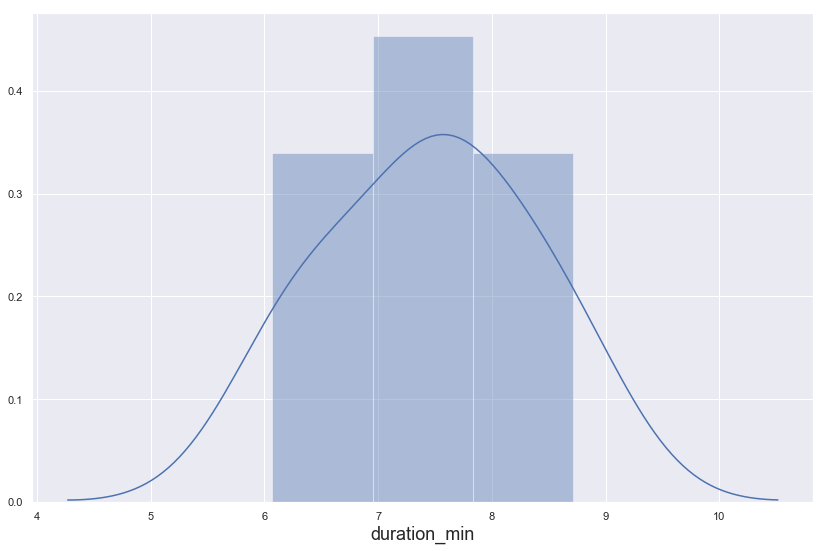

In [26]:
sns.distplot((crocoloko_tcca_df.duration_ms/1000.0)/60.0)
plt.xlabel('duration_min',fontsize=18)

### other features distributions

C:\Users\orenz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


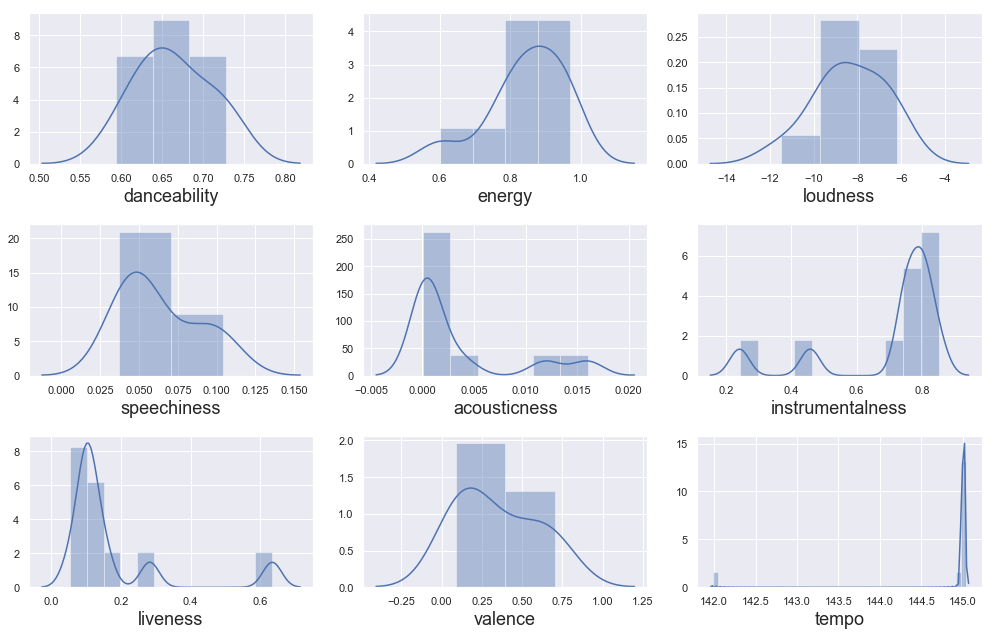

In [27]:
plt.subplot(331)
sns.distplot(crocoloko_tcca_df.danceability)
plt.xlabel('danceability', fontsize=18)

plt.subplot(332)
sns.distplot(crocoloko_tcca_df.energy)
plt.xlabel('energy', fontsize=18)

plt.subplot(333)
sns.distplot(crocoloko_tcca_df.loudness)
plt.xlabel('loudness', fontsize=18)

plt.subplot(334)
sns.distplot(crocoloko_tcca_df.speechiness)
plt.xlabel('speechiness', fontsize=18)

plt.subplot(335)
sns.distplot(crocoloko_tcca_df.acousticness)
plt.xlabel('acousticness', fontsize=18)

plt.subplot(336)
sns.distplot(crocoloko_tcca_df.instrumentalness)
plt.xlabel('instrumentalness', fontsize=18)

plt.subplot(337)
sns.distplot(crocoloko_tcca_df.liveness)
plt.xlabel('liveness', fontsize=18)

plt.subplot(338)
sns.distplot(crocoloko_tcca_df.valence)
plt.xlabel('valence', fontsize=18)

plt.subplot(339)
sns.distplot(crocoloko_tcca_df.tempo)
plt.xlabel('tempo', fontsize=18)

plt.tight_layout()
plt.show()


In [28]:
crocoloko_tcca_df.to_csv('crocoloko_tracks_data.csv')